# Project: Investigate the TMDb movie dataset
We would perform general analysis on this data set to get some insights 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this porject I choose the TMDb Movie dataset.<br/>
This dataset contains infromation about 10000 movies.



### Some Questions that I would like to get answers from this dataset are:
1) Which genres were most popular from decade to decade?<br/>
2) Top 5 movies with highest Profit?<br/>
3) What is the most liked timelength of all movies?<br/>
4) What is the number of movies released every year??<br/>



In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [50]:
movies=pd.read_csv("tmdb-movies.csv")
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [51]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [52]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [53]:
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [54]:
sum(movies.duplicated())

1

### Data Cleaning 
1) We need to remove the duplicates.<br/>
2) We need to fill the NaNs.<br/>
3) Change the format of Release Date.<br/>

In [55]:
#Remove duplicates
movies.drop_duplicates(inplace=True)

In [56]:
#Fill null values with 0
movies.fillna(0,inplace=True)

In [57]:
# Convert release date to datetime type format
movies["release_date"]=pd.to_datetime(movies["release_date"])

In [58]:
#Current rows and columns
movies.shape

(10865, 21)

In [59]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Lets drop the columns that are not needed for our questions i-e ["imdb_id","cast","homepage","tagline","keywords","overview","production_companies","vote_average","budget_adj","revenue_adj"]

In [60]:
movies.drop(["imdb_id","cast","homepage","tagline","keywords","overview","production_companies","vote_average","budget_adj","revenue_adj"],axis=1,inplace=True)

In [61]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
release_year      10865 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 1018.6+ KB


In [62]:
#Final rows and co
movies.shape

(10865, 11)

In [63]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,2015.000000


In [64]:
movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
release_year      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Which genres were most popular from decade to decade?

In [65]:
def categorise(feature,bins,bin_names):
    return pd.cut(movies[feature],bins,labels=bin_names)


In [66]:
#make a dataframe which is categorized with respect to release year in decade format
#Usse bins and cut fuction to do that
df_d=movies.copy()
bin=[1960,1970,1980,1990,2000,2010,2015]
bin_names=["60s","70s","80s","90s","2000s","2010s"]
df_d["release_year"]=categorise("release_year",bin,bin_names)

In [67]:
# Use a loop to find the popular genre for every decade
for i in bin_names:
    df_p=df_d[df_d["release_year"]==i]
    print(df_p[df_p["popularity"]==max(df_p["popularity"])]["genres"])
    print("____________________________________________________")

9719    Science Fiction|Mystery|Adventure
Name: genres, dtype: object
____________________________________________________
1329    Adventure|Action|Science Fiction
Name: genres, dtype: object
____________________________________________________
6081    Adventure|Comedy|Science Fiction|Family
Name: genres, dtype: object
____________________________________________________
2409    Drama
Name: genres, dtype: object
____________________________________________________
1386    Action|Adventure|Fantasy|Science Fiction
Name: genres, dtype: object
____________________________________________________
0    Action|Adventure|Science Fiction|Thriller
Name: genres, dtype: object
____________________________________________________


### Top 5 movies with highest Profit?

In [68]:
#Define a function to calculate the profit series
def Profit(feature1,feature2):
    return movies[feature1]-movies[feature2]

In [69]:
#Calculate the profit from the fuction
#Sort the obtained dataframe wrt to profit
profit=movies.copy()
profit["profit"]=Profit("revenue","budget")
profit.sort_values(["profit"],inplace=True)

In [70]:
#select the last 5 rows
profit=profit[-5:]
profit

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,release_year,profit
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,2015,1316249360
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015,1363528810
5231,597,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,1997,1645034188
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,2015,1868178225
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,2009,2544505847


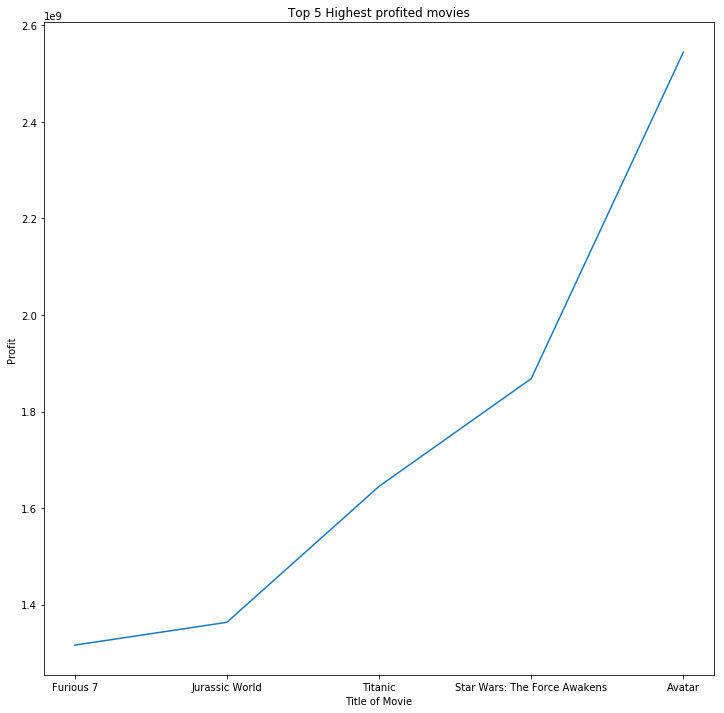

In [71]:
#Plot a graph for the top 5 profitable movies 
x=np.array(profit["original_title"])
index=[1,2,3,4,5]
y=np.array(profit["profit"])
plt.figure(figsize=(12,12))
plt.plot(index,y)
plt.xticks(index, x)
plt.title("Top 5 Highest profited movies")
plt.ylabel("Profit")
plt.xlabel("Title of Movie");

Here We try to get an idea of how the top 5 Profited movies have been distributed

### What is the most liked timelength of all movies ?

In [72]:
#Use group by to get the seperate average of popularities for all the runtimes
df_liked=movies.copy()
Most_liked=df_liked.groupby("runtime")["popularity"].mean()

In [73]:
x=movies["runtime"].unique()
x.sort()

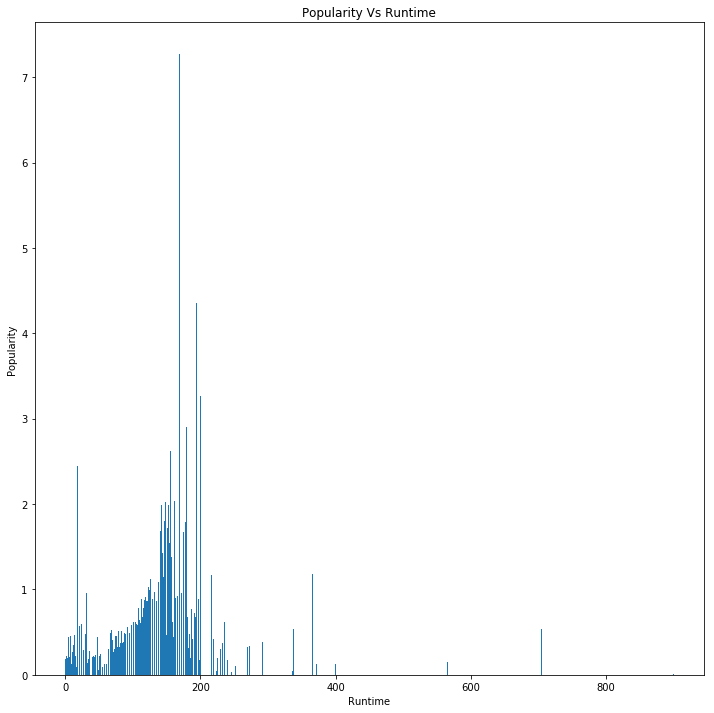

In [74]:
plt.figure(figsize=(12,12))
plt.bar(x,Most_liked)

plt.xlabel("Runtime")
plt.ylabel("Popularity")
plt.title("Popularity Vs Runtime");

Here we can see that the long runtime movies are not at all popular and even their is a significance difference in the very short and short runtime movies. The most popular one have an average runtime between 140-200

## What is the number of movies released every year?

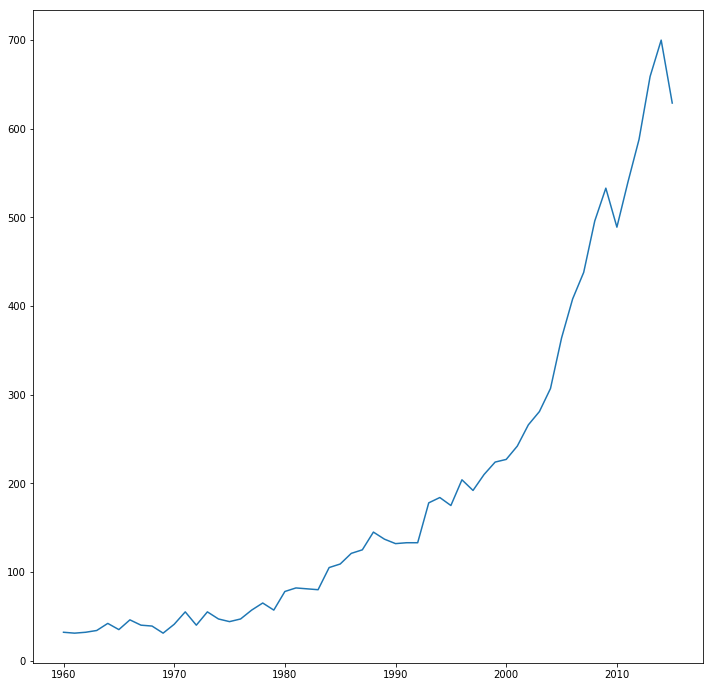

In [75]:
df_avg_mov=movies.copy()
No_mov=df_avg_mov["release_year"].value_counts().sort_index()
plt.figure(figsize=(12,12))
No_mov.plot();

Here we can see how the number of films released every year is increasing now a days compared to old days

<a id='conclusions'></a>
## Conclusions

So,<br/>
Popular genres w.r.t decades were:<br/>
1960-1970 - Science Fiction|Mystery|Adventure<br/>
1970-1980 - Adventure|Action|Science Fiction<br/>
1980-1990 - Adventure|Comedy|Science Fiction|Family<br/>
1990-2000 - Drama<br/>
2000-2010 - Action|Adventure|Fantasy|Science Fiction<br/>
2010-2015 - Action|Adventure|Science Fiction|Thriller<br/>
<br/>
The top 5 films with the highest profit are Avatar(2544505847), Star Wars: The Force Awakens, Titanic, Jurassic World, <br/>Furious 7(1316249360).<br/>
<br/>
The most liked runtime was around 140-200 minutes.<br/>
<br/>
The number of movies released every year is increasing drastically.<br/>

## Limitations

We have considered the nan values as 0 so that may cause problems when we use it in realworld.<br/>
Many important columns were also dropped we may need to consider them for more rubustness.<br/>

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0